In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import math

# Part 1. Overview of Datasets

In [349]:
all_stock=pd.read_csv('Data/all_stocks_2006-01-01_to_2018-01-01.csv')
all_stock['Date']=pd.to_datetime(all_stock['Date'])
all_stock

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
...,...,...,...,...,...,...,...
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA


In [350]:
superstore_dataset=pd.read_csv('Data/superstoresales.csv')
superstore_dataset['Order Date']=pd.to_datetime(superstore_dataset['Order Date'])
#superstore_data=superstore_dataset.loc(superstore_dataset['Order Date']<'2018-12-31')
#superstore_data=superstore_dataset(superstore_dataset['Order Date']<'2018-12-31')
superstore_dataset.sort_values(by='Order Date')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
540,541,CA-2015-140795,2015-01-02,03/02/2015,First Class,BD-11500,Bradley Drucker,Consumer,United States,Green Bay,Wisconsin,54302.0,Central,TEC-AC-10001432,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900
5713,5714,US-2015-143707,2015-01-03,05/03/2015,Standard Class,HR-14770,Hallie Redmond,Home Office,United States,New York City,New York,10035.0,East,TEC-PH-10003655,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940
157,158,CA-2015-104269,2015-01-03,06/03/2015,Second Class,DB-13060,Dave Brooks,Consumer,United States,Seattle,Washington,98115.0,West,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568
6548,6549,CA-2015-113880,2015-01-03,05/03/2015,Standard Class,VF-21715,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,60126.0,Central,OFF-PA-10003036,Office Supplies,Paper,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",17.472
7949,7950,CA-2015-131009,2015-01-03,05/03/2015,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907.0,Central,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,909,CA-2018-143259,2018-12-30,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776
645,646,CA-2018-126221,2018-12-30,05/01/2019,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300
907,908,CA-2018-143259,2018-12-30,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930
906,907,CA-2018-143259,2018-12-30,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136


The year range of stock prices is from 2006 to 2017 while the range of superstore is from 2015 to 2017,  
so we select 2015 to 2017 as the range of data.

In [351]:
selected_stock=all_stock.loc[(all_stock['Date']>'2015-01-01') & (all_stock['Date']<'2018-12-31')]
#Change the index into Date
#selected_stock=selected_stock.set_index('Date')
selected_stock

,Date,Open,High,Low,Close,Volume,Name
2265,2015-01-02,164.71,165.08,162.73,164.06,2117562,MMM
2266,2015-01-05,163.00,163.64,160.08,160.36,3692901,MMM
2267,2015-01-06,160.82,161.37,157.74,158.65,3537144,MMM
2268,2015-01-07,159.90,160.28,158.94,159.80,3081291,MMM
2269,2015-01-08,160.65,163.69,160.52,163.63,3149592,MMM
...,...,...,...,...,...,...,...
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA


# Part.2 Data cleaning

In [352]:
selected_stock.isna().sum()

Date       0
Open      24
High       9
Low       19
Close      0
Volume     0
Name       0
dtype: int64

In [353]:
superstore_dataset.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [383]:
selected_stock=selected_stock.dropna()
superstore_dataset=superstore_dataset.dropna()
superstore_dataset.drop(columns=['Row ID', 'Order ID', 'Customer ID','Postal Code','Product ID'], inplace = True)
#superstore_by_month=superstore_dataset.groupby(superstore_dataset['Order Date'].dt.strftime('%Y-%m'))['Sales'].sum().sort_values()
superstore_by_month=superstore_dataset.groupby(pd.Grouper(key='Order Date', freq='1M')).sum()
stock_by_month=selected_stock.groupby(pd.Grouper(key='Date',freq='M')).mean()
stock_by_month
#superstore_by_month
#stock_by_month['Close'].plot()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-31,106.574161,107.572468,105.291290,106.388694,1.539121e+07
2015-02-28,111.050255,112.067589,110.339389,111.440611,1.338270e+07
2015-03-31,112.212229,113.094150,111.358065,112.184340,1.317047e+07
2015-04-30,112.687005,113.590015,111.806406,112.674040,1.312945e+07
2015-05-31,114.317419,115.043758,113.542855,114.262306,1.114052e+07
2015-06-30,113.717214,114.432639,112.973328,113.597463,1.116851e+07
2015-07-31,116.596217,117.495396,115.604765,116.532903,1.175969e+07
2015-08-31,116.142012,117.355269,114.513825,115.886743,1.516490e+07
2015-09-30,112.019908,113.042243,110.808203,111.907066,1.405533e+07


# Part.3 

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-31,106.574161,107.572468,105.291290,106.388694,1.539121e+07
2015-02-28,111.050255,112.067589,110.339389,111.440611,1.338270e+07
2015-03-31,112.212229,113.094150,111.358065,112.184340,1.317047e+07
2015-04-30,112.687005,113.590015,111.806406,112.674040,1.312945e+07
2015-05-31,114.317419,115.043758,113.542855,114.262306,1.114052e+07
2015-06-30,113.717214,114.432639,112.973328,113.597463,1.116851e+07
2015-07-31,116.596217,117.495396,115.604765,116.532903,1.175969e+07
2015-08-31,116.142012,117.355269,114.513825,115.886743,1.516490e+07
2015-09-30,112.019908,113.042243,110.808203,111.907066,1.405533e+07


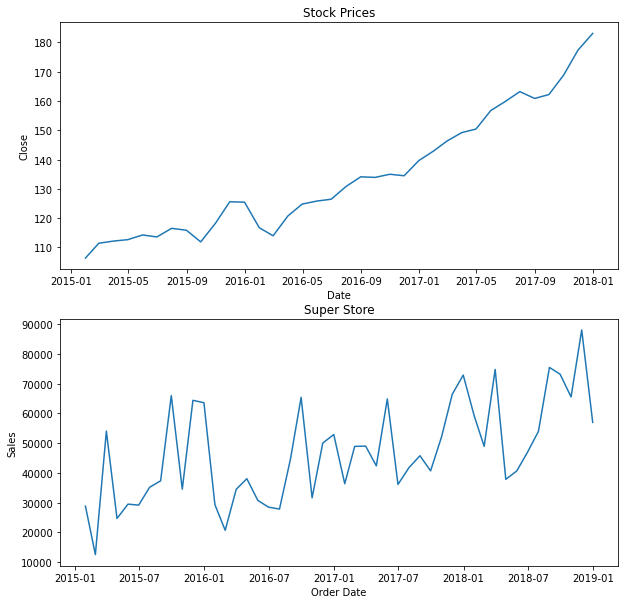

In [384]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
sns.lineplot(x=stock_by_month.index,y=stock_by_month['Close'],ax=ax[0])
sns.lineplot(x=superstore_by_month.index,y=superstore_by_month['Sales'],ax=ax[1])
ax[0].set_title('Stock Prices')
ax[1].set_title('Super Store')
stock_by_month

# Part.4 Calculation

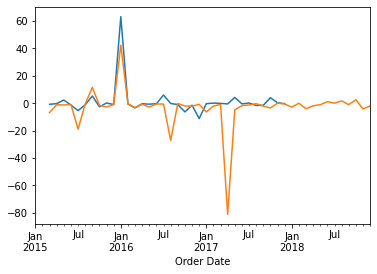

In [385]:
ROC_stock=stock_by_month['Close'].pct_change().pct_change()
#ROC_stock

#df=pd.DataFrame({'pct':ROC_stock})
#df['pct']=math.sqrt(df['pct'])
#df['pct_modified']=df['pct']**(1/2)
#ROC_stock['Close']=math.sqrt(ROC_stock['Close'])
#df
ROC_stock.plot()
#df

ROC_SS=superstore_by_month['Sales'].pct_change().pct_change()
ROC_SS.plot()

In [386]:
ROC_stock.idxmin(ROC_stock)
#ROC_SS.idxmin()

Timestamp('2016-12-31 00:00:00', freq='M')

From the plot we can see that the sales of super store has a seasonal rise and falls.  
But normally, when the overall performance of stock market drops, it has influence on super store sales.  
An obvious example is the period around the beginning of 2016, while the stock prize goes down, there shows a significant drop on super store sales.

In [387]:
df_corr=pd.DataFrame()
df_corr['ROC_Stock']=ROC_stock
df_corr['ROC_SS']=ROC_SS
df_corr=df_corr.dropna()
df_corr.corr()


,ROC_Stock,ROC_SS
ROC_Stock,1.000000,0.485779
ROC_SS,0.485779,1.000000


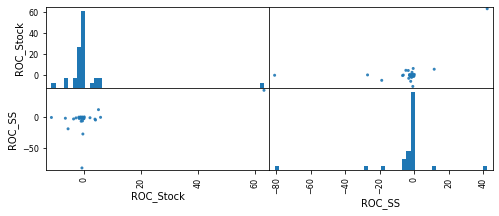

In [388]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(df_corr, alpha=0.9, hist_kwds={'bins':50}, figsize=(8,3))

In [389]:
smdf=superstore_dataset
smdf.rename(columns = { 'Order Date' : 'order_date', 'Ship Date' : 'ship_date', 'Ship Mode' : 'ship_mode', 'Sub-Category' : 'sub_category',}, inplace = True)

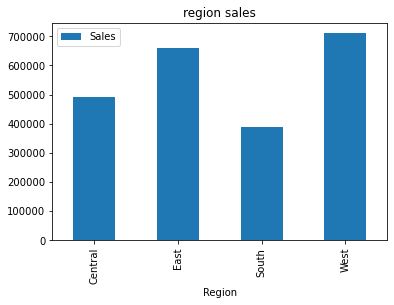

In [390]:
sales_region = smdf.groupby('Region').agg({'Sales' : sum})
# sales_region.plot(kind = 'bar',
#                   figsize = (12,5),
#                   title = 'Region-wise Sales',
#                   rot = 0)
sales_region.plot(kind='bar',
                 title='region sales')

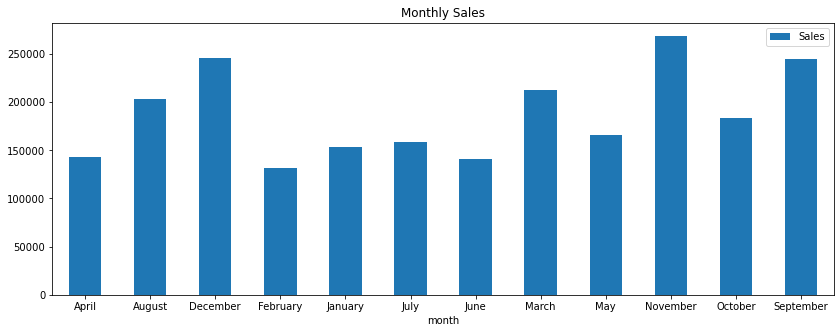

In [391]:
smdf['order_date'] = pd.to_datetime(smdf['order_date'], dayfirst = True)
smdf['ship_date'] = pd.to_datetime(smdf['ship_date'], dayfirst = True)
smdf['year'] = smdf['order_date'].dt.year
smdf['month'] = smdf['order_date'].dt.month_name()
monthly_sales = smdf.groupby('month').agg({'Sales' : sum})
monthly_sales.plot(kind = 'bar',
                   title = 'Monthly Sales',
                   figsize = (14,5),
                   rot = 0)


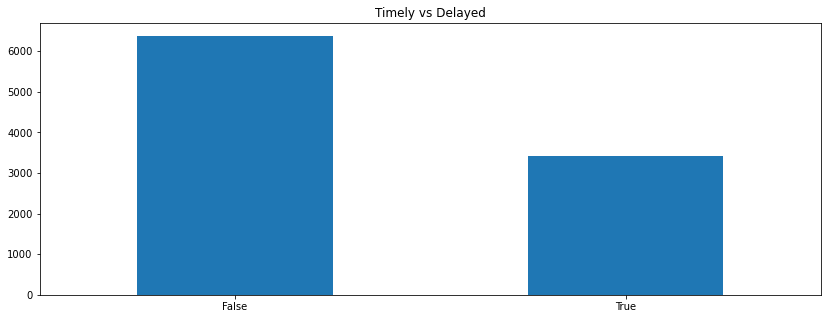

In [392]:
smdf['order_date'] = pd.to_datetime(smdf['order_date'], dayfirst = True)
smdf['ship_date'] = pd.to_datetime(smdf['ship_date'], dayfirst = True)
smdf['shipment_in_days'] = smdf['ship_date'] - smdf['order_date']
smdf['shipment_in_days'] = smdf['shipment_in_days'].dt.days
smdf['is_delay'] = [True if s > 5 else False for s in smdf['shipment_in_days']]
smdf['is_delay']
smdf['is_delay'].value_counts().plot(kind = 'bar',
           figsize = (14,5),
           title = 'Timely vs Delayed',
           rot = 0)

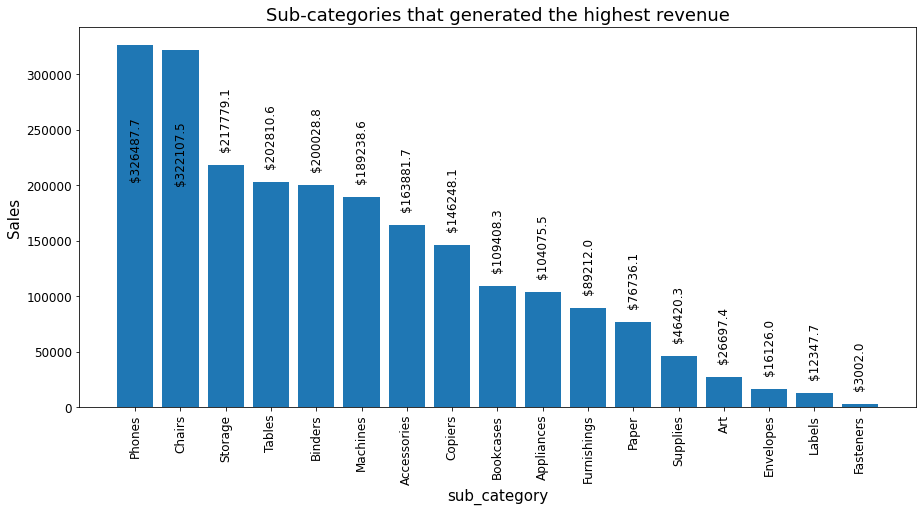

In [393]:
dfsub = smdf.groupby(["sub_category"]).sum().sort_values("Sales", ascending=False).head(20) 
dfsub = dfsub[["Sales"]].round(1) 
dfsub.reset_index(inplace=True) 
plt.figure(figsize = (15,7)) # width and height of figure is defined in inches
plt.title("Sub-categories that generated the highest revenue", fontsize=18) 
plt.bar(dfsub["sub_category"], dfsub["Sales"], linewidth = 1)
plt.xlabel("sub_category",fontsize=15) # x axis shows the States
plt.ylabel("Sales",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in dfsub["Sales"].items(): #To show the exact revenue generated on the figure
    if v>300000:
        plt.text(k,v-120000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

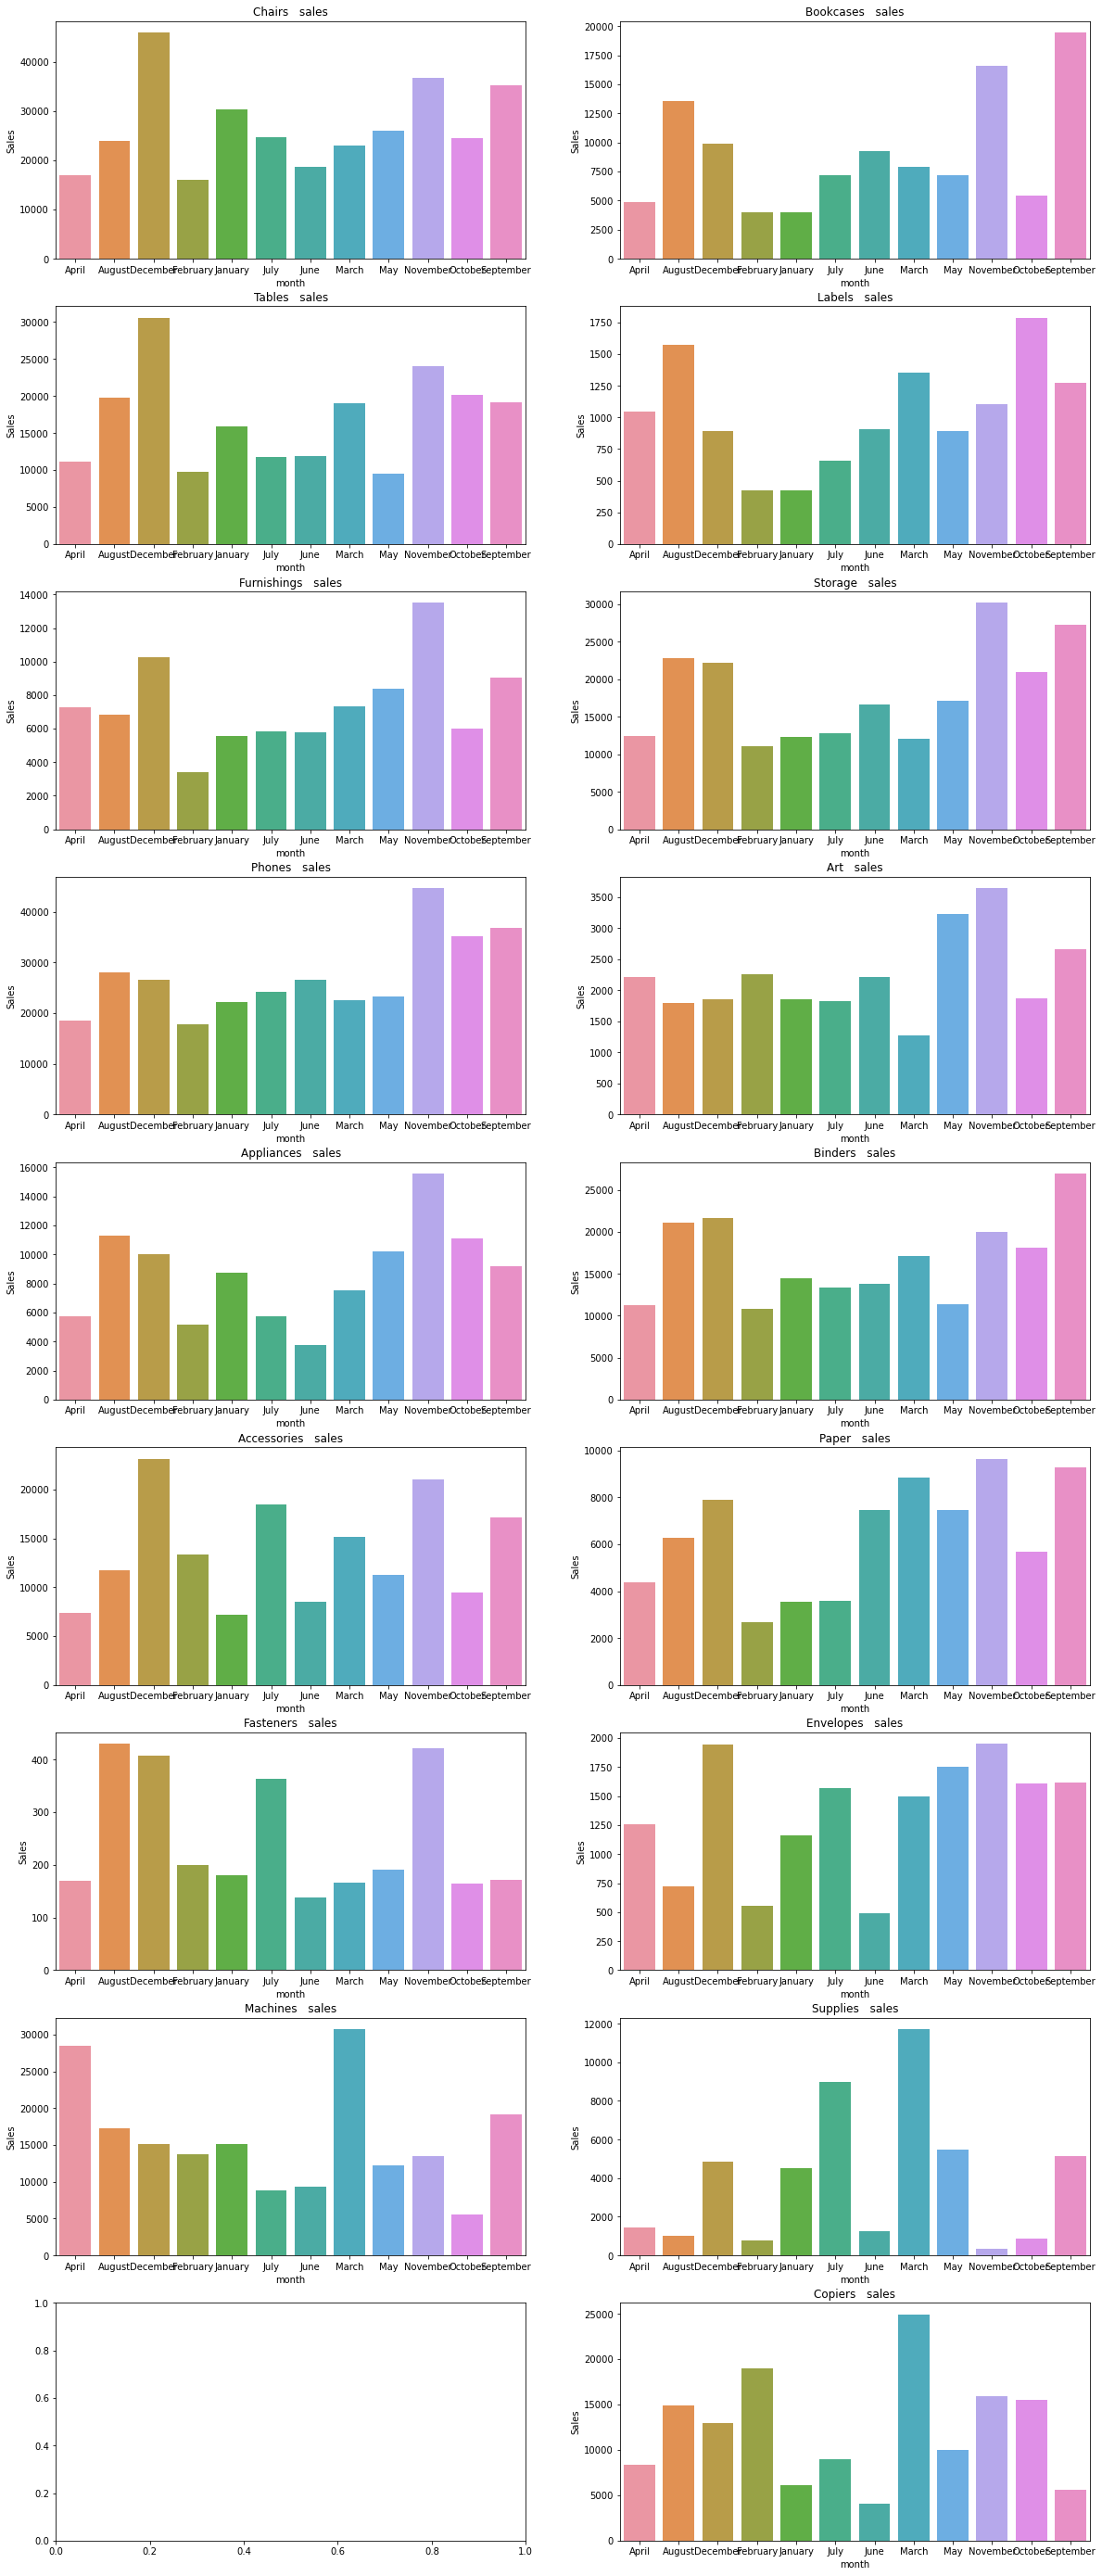

In [394]:

sub_df=smdf.groupby(['sub_category','month']).agg({'Sales':sum}).reset_index()
sub_catagory=smdf['sub_category'].unique()
fig,ax= plt.subplots(9, 2, figsize=(20,50))
for i in enumerate(sub_catagory):
    t=sub_df.loc[sub_df['sub_category']==i[1]]
    _=sns.barplot(x='month',y='Sales',data=t,ax=ax[int(i[0]/2)][i[0]%2-1]).set_title(i[1]+'   sales')
    

    
    


# Part.5 Heatmap

Text(0.5, 1.0, 'Super Store')

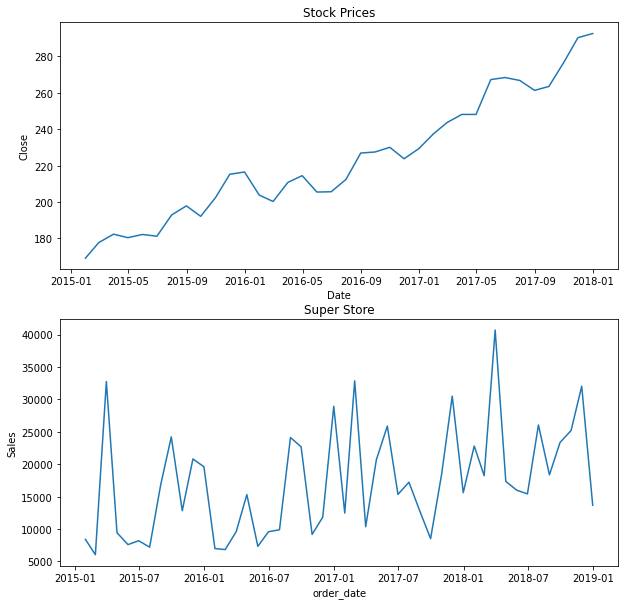

In [450]:
tech_product = superstore_dataset[superstore_dataset['Category']=='Technology']
tech_product
tech_stock = selected_stock[(selected_stock['Name']=='GOOGL')|(selected_stock['Name']=='AAPL')|(selected_stock['Name']=='CSCO')|(selected_stock['Name']=='IBM')|(selected_stock['Name']=='INTC')]
tech_product_bymonth = tech_product.groupby(pd.Grouper(key = 'order_date',freq = 'M')).sum()
tech_stock_bymonth = tech_stock.groupby(pd.Grouper(key = 'Date',freq = 'M')).mean()
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
sns.lineplot(x=tech_stock_bymonth.index,y=tech_stock_bymonth['Close'],ax=ax[0])
sns.lineplot(x=tech_product_bymonth.index,y=tech_product_bymonth['Sales'],ax=ax[1])
ax[0].set_title('Stock Prices')
ax[1].set_title('Super Store')
#tech_product_bymonth

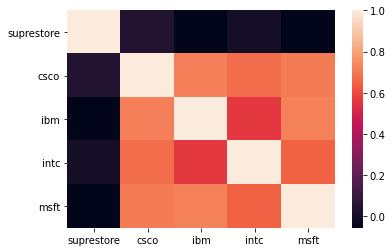

In [452]:
csco_price=selected_stock[selected_stock['Name']=='CSCO']
csco_price=csco_price.set_index('Date')
ibm_price=selected_stock[selected_stock['Name']=='IBM']
ibm_price=ibm_price.set_index('Date')
intc_price=selected_stock[selected_stock['Name']=='INTC']
intc_price=intc_price.set_index('Date')
msft_price=selected_stock[selected_stock['Name']=='MSFT']
msft_price=msft_price.set_index('Date')
#intc_price
ROC_SS_pct=superstore_by_month['Sales'].pct_change()
ROC_csco=csco_price['Close'].pct_change()
ROC_ibm=ibm_price['Close'].pct_change()
ROC_intc=intc_price['Close'].pct_change()
ROC_msft=msft_price['Close'].pct_change()

#ROC_msft
ROC_Tech=pd.DataFrame()
ROC_Tech['suprestore']=ROC_SS_pct
ROC_Tech['csco']=ROC_csco
ROC_Tech['ibm']=ROC_ibm
ROC_Tech['intc']=ROC_intc
ROC_Tech['msft']=ROC_msft
#ROC_Tech
sns.heatmap(ROC_Tech.corr())
#ROC_Tech
#ibm_price
#apple_price
#selected_stock